In [1]:
# add your data (ie: CSV, JSON, etc.) to the static/data folder 
# explore the data using this notebook if you want :)
# Import our dependencies
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import h5py

#  Import and read the charity_data.csv.
BlackFriday_df = pd.read_csv("Resources/Sales_Product_Price_by_Store_JFC.csv")
BlackFriday_df

,Store,Product,Date,Day_of_Year,Is_Holiday,Base Price,Price,Weekly_Units_Sold
0,10,3,7/20/2012,202,False,19.99,10.00,2557
1,10,3,7/27/2012,209,False,19.99,10.00,2524
2,10,3,7/23/2010,204,False,19.99,10.00,2153
3,10,3,7/30/2010,211,False,19.99,10.00,2103
4,10,3,7/22/2011,203,False,21.99,11.00,1931
...,...,...,...,...,...,...,...,...
3856,5,3,10/28/2011,301,False,21.99,21.99,15
3857,5,3,3/18/2011,77,False,21.99,21.99,14
3858,5,3,6/3/2011,154,False,21.99,21.99,14
3859,5,3,6/17/2011,168,False,21.99,21.99,14


## Exploratory Data Analysis

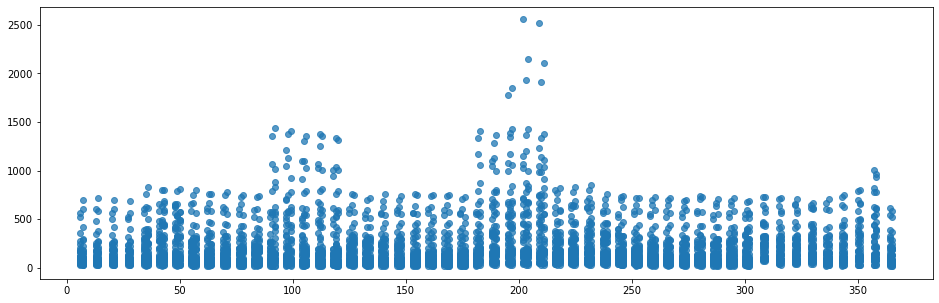

In [2]:
# x values are day of the year
x_axis = BlackFriday_df['Day_of_Year']

# y values are the weekly units sold
data = BlackFriday_df['Weekly_Units_Sold']

# Tells matplotlib that we want to make a scatter plot
plt.figure(figsize=(16,5))
plt.scatter(x_axis, data, marker="o", alpha=0.75)

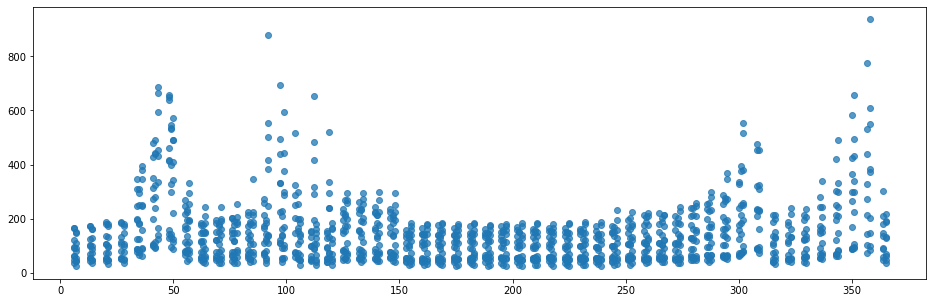

In [3]:
# filter for product 1
BlackFriday_P1_df = BlackFriday_df[BlackFriday_df['Product'] == 1]

# x values are day of the year
x_axis = BlackFriday_P1_df['Day_of_Year']

# y values are the weekly units sold
data = BlackFriday_P1_df['Weekly_Units_Sold']

# Tells matplotlib that we want to make a scatter plot
plt.figure(figsize=(16,5))
plt.scatter(x_axis, data, marker="o", alpha=0.75)

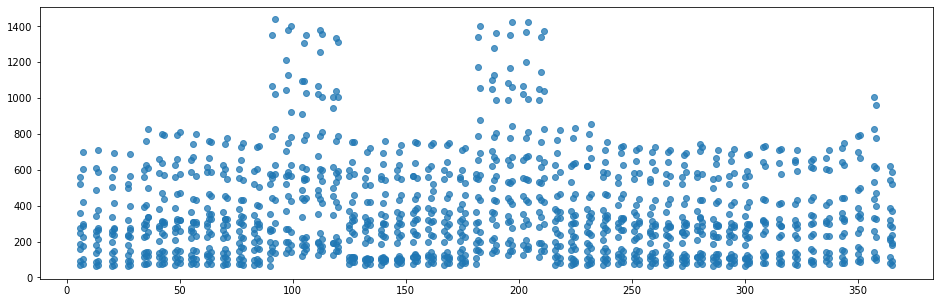

In [4]:
# filter for product 2
BlackFriday_P2_df = BlackFriday_df[BlackFriday_df['Product'] == 2]

# x values are day of the year
x_axis = BlackFriday_P2_df['Day_of_Year']

# y values are the weekly units sold
data = BlackFriday_P2_df['Weekly_Units_Sold']

# Tells matplotlib that we want to make a scatter plot
plt.figure(figsize=(16,5))
plt.scatter(x_axis, data, marker="o", alpha=0.75)

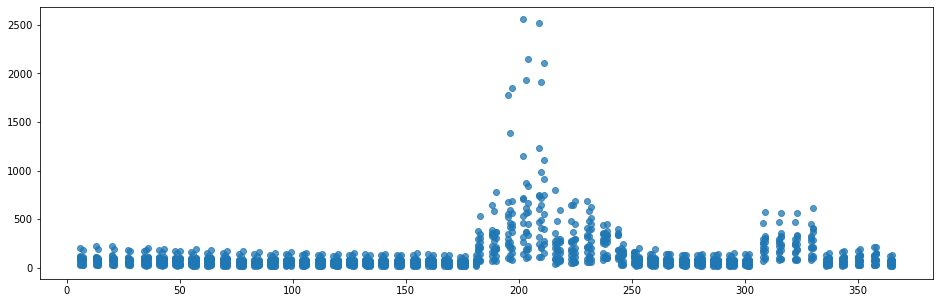

In [5]:
# filter for product 3
BlackFriday_P3_df = BlackFriday_df[BlackFriday_df['Product'] == 3]

# x values are day of the year
x_axis = BlackFriday_P3_df['Day_of_Year']

# y values are the weekly units sold
data = BlackFriday_P3_df['Weekly_Units_Sold']

# Tells matplotlib that we want to make a scatter plot
plt.figure(figsize=(16,5))
plt.scatter(x_axis, data, marker="o", alpha=0.75)

## Preprocessing

In [6]:
BlackFriday_df.columns

Index(['Store', 'Product', 'Date', 'Day_of_Year', 'Is_Holiday', 'Base Price',
       'Price', 'Weekly_Units_Sold'],
      dtype='object')

In [7]:
from datetime import datetime, date
day_of_year = date(2007, 12, 31).timetuple().tm_yday  # returns 1 for January 1st
day_of_year

365

In [8]:
# Convert categorical data to numeric with `pd.get_dummies`
BlackFriday_convert_df = pd.get_dummies(BlackFriday_df, columns=['Product', 'Is_Holiday'])

# Drop the 'Is_Holiday_False' column since it is just the reverse of the 'Is_Holiday_True' column
BlackFriday_convert_df = BlackFriday_convert_df.drop('Is_Holiday_False', axis = 1)
BlackFriday_convert_df = BlackFriday_convert_df.drop('Date', axis = 1)
BlackFriday_convert_df = BlackFriday_convert_df.drop('Store', axis = 1)
BlackFriday_convert_df

,Day_of_Year,Base Price,Price,Weekly_Units_Sold,Product_1,Product_2,Product_3,Is_Holiday_True
0,202,19.99,10.00,2557,0,0,1,0
1,209,19.99,10.00,2524,0,0,1,0
2,204,19.99,10.00,2153,0,0,1,0
3,211,19.99,10.00,2103,0,0,1,0
4,203,21.99,11.00,1931,0,0,1,0
...,...,...,...,...,...,...,...,...
3856,301,21.99,21.99,15,0,0,1,0
3857,77,21.99,21.99,14,0,0,1,0
3858,154,21.99,21.99,14,0,0,1,0
3859,168,21.99,21.99,14,0,0,1,0


In [9]:
# filter for product 3
BlackFriday_Is_Holiday_True_df = BlackFriday_convert_df[BlackFriday_convert_df['Is_Holiday_True'] == 1]
BlackFriday_Is_Holiday_True_df

,Day_of_Year,Base Price,Price,Weekly_Units_Sold,Product_1,Product_2,Product_3,Is_Holiday_True
92,42,5.99,5.99,798,0,1,0,1
93,43,5.99,5.99,795,0,1,0,1
151,253,5.99,5.99,719,0,1,0,1
158,252,5.99,5.99,713,0,1,0,1
185,43,9.99,7.99,687,1,0,0,1
...,...,...,...,...,...,...,...,...
3794,42,21.99,21.99,21,0,0,1,1
3797,252,21.99,21.99,21,0,0,1,1
3811,365,19.99,19.99,19,0,0,1,1
3841,365,19.99,19.99,17,0,0,1,1


In [10]:
# Split our preprocessed data into our features and target arrays
X = BlackFriday_convert_df.drop("Weekly_Units_Sold", axis=1)
y = BlackFriday_convert_df["Weekly_Units_Sold"].values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [11]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

### Deep Neural Network 1

In [12]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 7
hidden_nodes_layer1 =  10
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer1, input_dim = number_input_features, activation = "relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units = hidden_nodes_layer2, activation = "relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units = 1, activation = "sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
91/91 [==============================] - 1s 888us/step - loss: -194.4474 - accuracy: 0.0000e+00
Epoch 2/100
91/91 [==============================] - 0s 928us/step - loss: -628.4572 - accuracy: 0.0000e+00
Epoch 3/100
91/91 [==============================] - 0s 912us/step - loss: -1751.9966 - accuracy: 0.0000e+00
Epoch 4/100
91/91 [==============================] - 0s 992us/step - loss: -4204.7139 - accuracy: 0.0000e+00
Epoch 5/100
91/91 [==============================] - 0s 985us/step - loss: -8333.0918 - accuracy: 0.0000e+00
Epoch 6/100
91/91 [==============================] - 0s 1ms/step - loss: -14525.8691 - accuracy: 0.0000e+00
Epoch 7/100
91/91 [==============================] - 0s 1ms/step - loss: -23193.2910 - accuracy: 0.0000e+00
Epoch 8/100
91/91 [==============================] - 0s 1ms/step - loss: -34652.7969 - accuracy: 0.0000e+00
Epoch 9/100
91/91 [==============================] - 0s 1ms/step - loss: -49205.6055 - accuracy: 0.0000e+00
Epoch 10/100
91/91 [=====

91/91 [==============================] - 0s 1ms/step - loss: -13448672.0000 - accuracy: 0.0000e+00
Epoch 76/100
91/91 [==============================] - 0s 1ms/step - loss: -13892062.0000 - accuracy: 0.0000e+00
Epoch 77/100
91/91 [==============================] - 0s 1ms/step - loss: -14342296.0000 - accuracy: 0.0000e+00
Epoch 78/100
91/91 [==============================] - 0s 1ms/step - loss: -14802365.0000 - accuracy: 0.0000e+00
Epoch 79/100
91/91 [==============================] - 0s 1ms/step - loss: -15270750.0000 - accuracy: 0.0000e+00
Epoch 80/100
91/91 [==============================] - 0s 1ms/step - loss: -15745995.0000 - accuracy: 0.0000e+00
Epoch 81/100
91/91 [==============================] - 0s 1ms/step - loss: -16229158.0000 - accuracy: 0.0000e+00
Epoch 82/100
91/91 [==============================] - 0s 1ms/step - loss: -16721542.0000 - accuracy: 0.0000e+00
Epoch 83/100
91/91 [==============================] - 0s 1ms/step - loss: -17223252.0000 - accuracy: 0.0000e+00
Epoch

### Deep Neural Network 2

In [15]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=7))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [16]:
# Import the kerastuner library
import keras_tuner as kt

In [17]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [18]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

INFO:tensorflow:Oracle triggered exit
